## HW 4: Sampling and All-Pass Systems


## Question 1:

Write a function to perform a truncated sinc interpolation of a discrete signal x[n].
That is, implement the equation:

$\hat{x}_c(t) = \sum_{n=-N}^{N} x[n]sinc{(\frac{t-nT}{T})}$ 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

def trunc_sinc_interpolation(x, t, N, T):
    x_c = np.zeros(len(t))
    for n in range(-N, N):  # Adjust the range of n
        input = (t - n * T) / T
        x_c += x[n] * np.sinc(input)
    return x_c


Now consider three continuous sinusoid signals of the form:

$x_c(t) = \sin{(\Omega t)}$

with angular frequencies Ω = 2π, 4π, and 8π radians / sec.

(a) What is the Nyquist rate for each of the three sinusoids?

1. $\Omega = 2\pi $: Nyquist rate is 4$\pi$
2. $\Omega = 4\pi $: Nyquist rate is 8$\pi$
3. $\Omega = 8\pi $: Nyquist rate is 16$\pi$

(b) What sampling period (in seconds) do you need to avoid aliasing of these sinusoids?

1. $T <= 0.5$
2. $T <= 0.25$
3. $T <= 0.125$

(c) For each of the three sinusoids, create a discrete signal x[n] by sampling xc(t) at a
rate of 5 Hz. Set N so that −N ≤ n ≤ N corresponds to a continuous time range
of −2 ≤ t ≤ 2 seconds

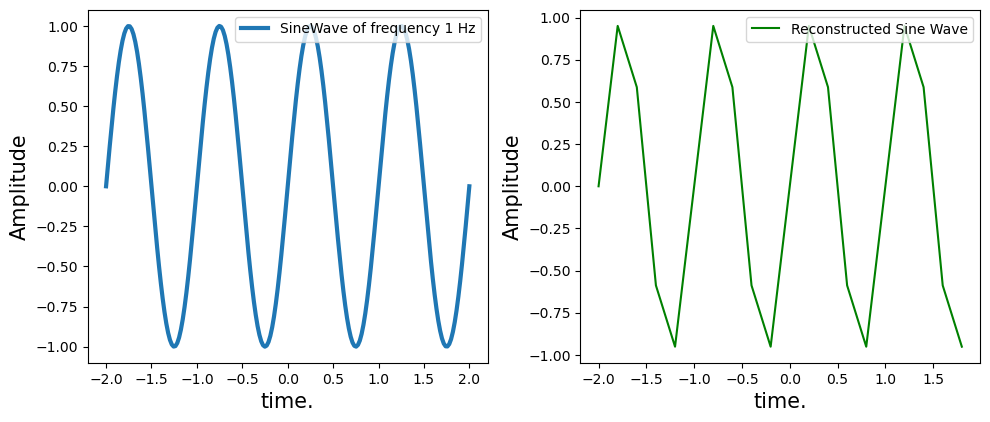

In [39]:
f = 1 # Hz
# -2 to 2 time space with 200 steps
t = np.linspace(-2, 2, 200)
# original, non-sampled signal
x1_2pi = np.sin(2 * np.pi * f * t)

# sampling rate of 5 hz --> 5 samples a second
samplingRate = 5

T = 1 / samplingRate
# -2 to 2
n = np.arange(-2/T,2 / T)
nT = n * T
# sampled signal
x2_2pi = np.sin(2 * np.pi * f * nT) 

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t, x1_2pi, linewidth=3, label='SineWave of frequency 1 Hz')
plt.xlabel('time.', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2_2pi, 'g-', label='Reconstructed Sine Wave')
plt.xlabel('time.', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

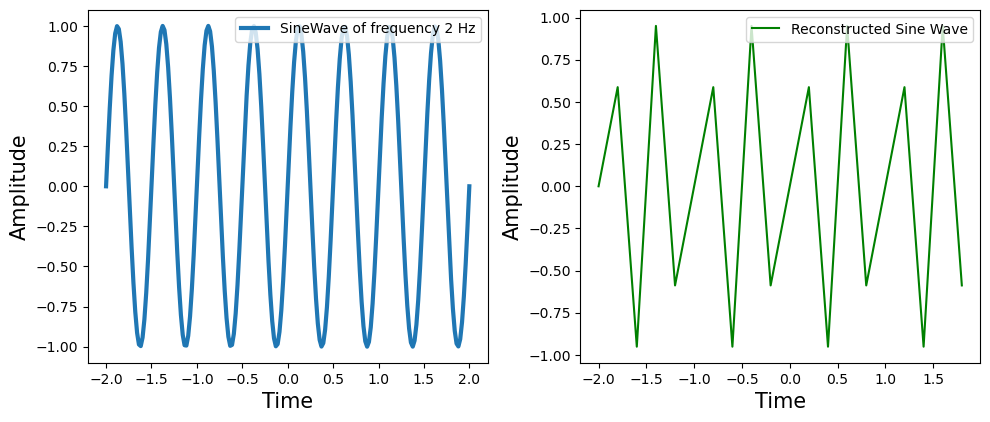

In [40]:
f = 2 # Hz
# -2 to 2 time space with 200 steps
t = np.linspace(-2, 2, 200)
# original, non-sampled signal
x1_4pi = np.sin(2 * np.pi * f * t)

# sampling rate of 5 hz --> 5 samples a second
samplingRate = 5 

T = 1 / samplingRate
# make it n = np.arange(-2/T,2 / T, T) ?
n = np.arange(-2/T,2 / T)
nT = n * T
# sampled signal
x2_4pi = np.sin(2 * np.pi * f * nT) 

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t, x1_4pi, linewidth=3, label='SineWave of frequency 2 Hz')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2_4pi, 'g-', label='Reconstructed Sine Wave')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()


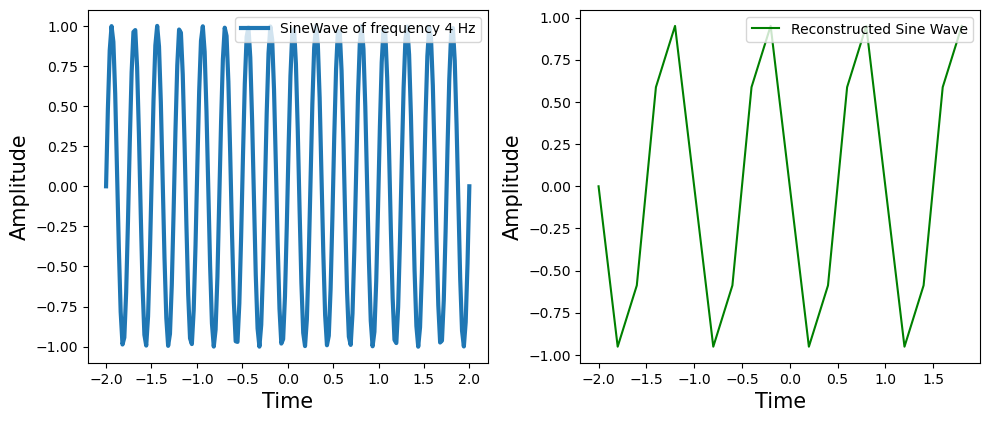

In [41]:
f = 4 # Hz
# -2 to 2 time space with 200 steps
t = np.linspace(-2, 2, 200)
# original, non-sampled signal
x1_8pi = np.sin(2 * np.pi * f * t)

# sampling rate of 5 hz --> 5 samples a second
samplingRate = 5

T = 1 / samplingRate
n = np.arange(-2/T,2 / T)
nT = n * T
# sampled signal
x2_8pi = np.sin(2 * np.pi * f * nT) 

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t, x1_8pi, linewidth=3, label='SineWave of frequency 4 Hz')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2_8pi, 'g-', label='Reconstructed Sine Wave')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

(d) Run your truncated sinc interpolation of x[n] to get a reconstructed continuous
signal, ˆxc(t). Plot xc(t) and ˆxc(t) as curves using different colors in the same plot
(with time range −2 ≤ t ≤ 2). Still in the same plot, overlay x[n] as a stem plot,
making sure to align the discrete samples with their corresponding time points.
Repeat this for each of the three sinusoid frequencies.

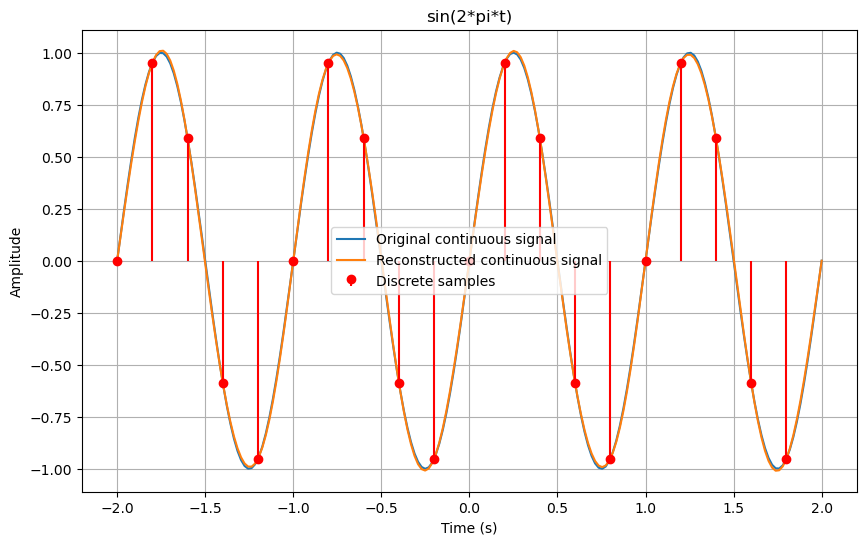

In [42]:
x_hat = trunc_sinc_interpolation(x2_2pi, t, len(n), T)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1_2pi, label='Original continuous signal')
plt.plot(t, x_hat, label='Reconstructed continuous signal')
plt.stem(nT, x2_2pi, 'r', label='Discrete samples', basefmt=' ')
plt.title('sin(2*pi*t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

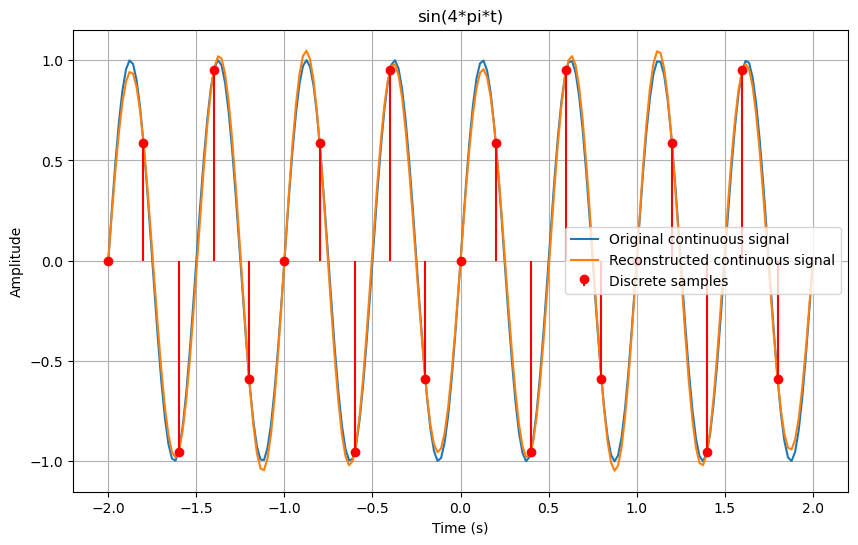

In [43]:
x_hat = trunc_sinc_interpolation(x2_4pi, t, len(n), T)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1_4pi, label='Original continuous signal')
plt.plot(t, x_hat, label='Reconstructed continuous signal')
plt.stem(nT, x2_4pi, 'r', label='Discrete samples', basefmt=' ')
plt.title('sin(4*pi*t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

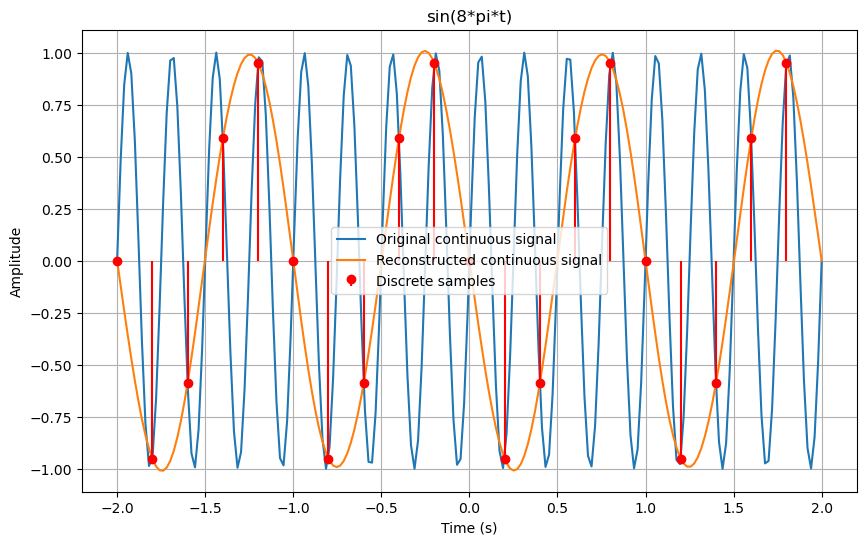

In [44]:
x_hat = trunc_sinc_interpolation(x2_8pi, t, len(n), T)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1_8pi, label='Original continuous signal')
plt.plot(t, x_hat, label='Reconstructed continuous signal')
plt.stem(nT, x2_8pi, 'r', label='Discrete samples', basefmt=' ')
plt.title('sin(8*pi*t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

_(e) Describe what you see in the three plots. Which frequencies “work” and which do
not? Explain why this happens._

The signal for sin(2pit) is a strong reconstruction of the sinc function, given that some of its edges are sharp and do not meet some of the fluid characteristics of the original wave signal. However, the sampling frequency falls within the bounds of the Nyquist rate, and so the reconstruction is accurate.

The signal for sin(4pit) is a strong reconstruction of the sinc function, given that some of its edges are sharp and do not meet some of the fluid characteristics of the original wave signal. It is slightly worse than the signal for sin(2pi), but the sampling frequency falls within the bounds of the Nyquist rate though it is nearing the lower limit where the reconstruction would be inaccurate.


The signal for sin(8pit) that has significant deviations from the intended target signal, which is a result of the sampling frequency being under the limit defined under the Nyquist frequency. This causes a loss of information and outputs an incorrect form.

## Question 2:

2. Consider the following continuous signal:

$x_c(t)
\begin{equation}
    \begin{aligned}
        =
        \begin{cases}
            1 & \text{if floor}(t + 0.5) \text{ is even} \\
            -1 & \text{otherwise}
        \end{cases}
    \end{aligned}
\end{equation}$

(a) Plot xc(t) in the range −2 sec. ≤ t ≤ 2 sec.

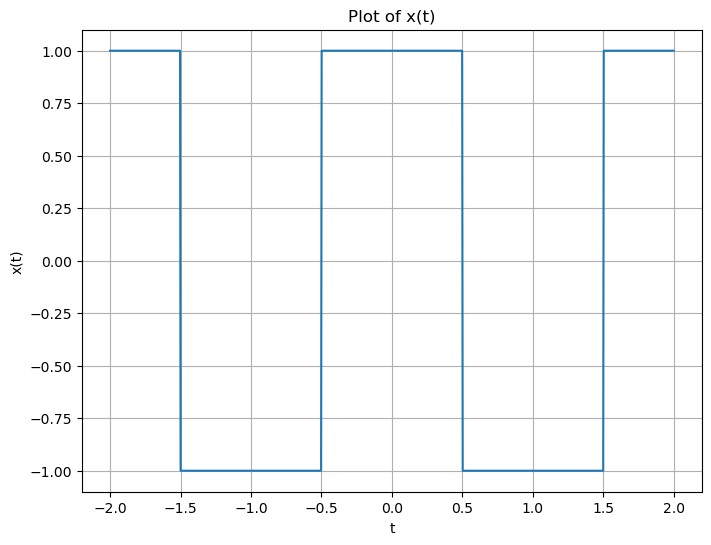

In [2]:
# Define the function x(t)
def x(t):
    if (np.floor(t + 0.5) % 2 == 0):
        return 1
    else:
        return -1

# Create an array of t values in the range -2 <= t <= 2
t = np.linspace(-2, 2, 1000)

# Evaluate the function x(t) for each value of t
y = [x(t_val) for t_val in t]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Plot of x(t)')
plt.grid(True)
plt.show()

(b) What is the Fourier transform of xc(t)? Hint: use the following properties of the
Fourier transform:

F{rect(t)} = $\frac{1}{\sqrt{2\pi}}$sinc$(\frac{\Omega}{2\pi})$   Fourier of the rectangular function 

F{x(t-t_0} = $e^{-it_0w}F{x(t)}$     Time SHift Property

F{ax(t) + by(t)} = $aF{x(t)} + bF{y(t)}$       Linearity






$x_c(t) = rect(\frac{(t+0.5)}{2})-rect(\frac{(t-0.5)}{2})$

$F\{x_c(t)\} = e^{\frac{iw}{4}}F\{rect(\frac{t}{2})\} - e^{\frac{-iw}{4}}F\{rect(\frac{t}{2})\} = F\{rect(\frac{t}{2})\} (e^{\frac{iw}{4}}- e^{\frac{-iw}{4}})$

$F\{x_c(t)\} = \frac{1}{\sqrt{2\pi}}$sinc$(\frac{\Omega}{2\pi})(e^{\frac{iw}{4}}- e^{\frac{-iw}{4}})$



_(c) Sample xc(t) with time period T = 0.2 to get a discrete signal x[n] in the range
−10 ≤ n ≤ 10. Now try to recover the continuous signal by using your truncated
sinc interpolation function. Repeat for N = 10, 20, 50, 100, 1000 and with corresponding sampling periods T = 2/N seconds. For each value of N, generate a plot
in the same was as in part 1(d) of xc(t), x[n], and your reconstructed continuous
signal, ˆxc(t). What do you notice about the reconstructed signal as you increase
N?_

The increasing of N leads to a stronger representation of the rectangular function as attentuation for the waves becomes increasingly finer.

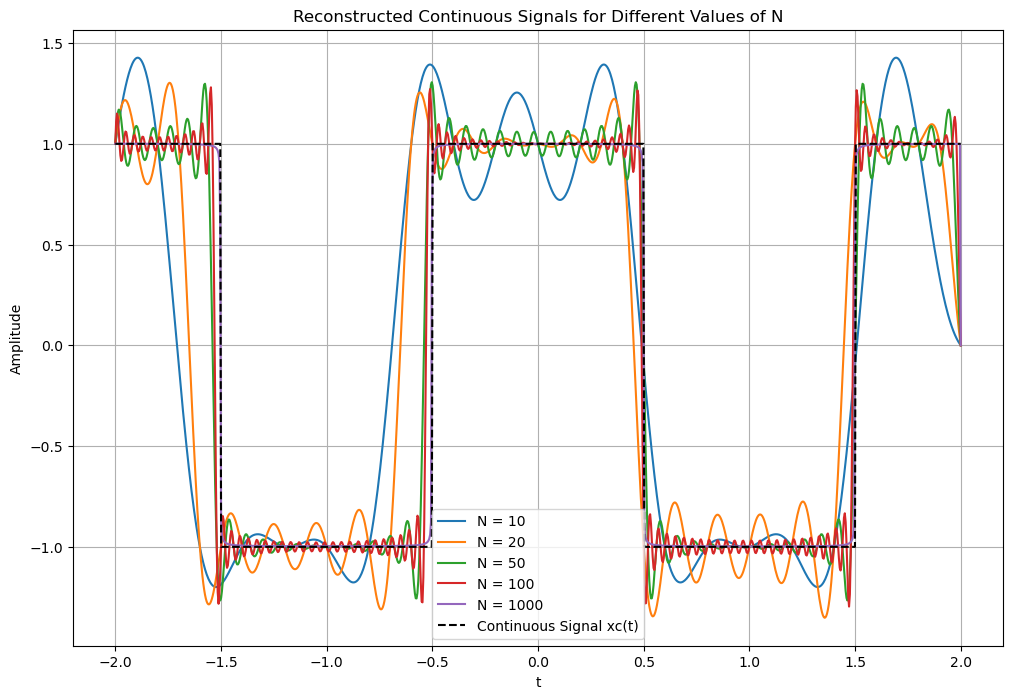

In [45]:
# Create an array of t values in the range -2 <= t <= 2
t = np.linspace(-2, 2, 1000)

# Evaluate the function x(t) for each value of t
xc = np.array([x(t_val) for t_val in t])

# Different values of N
N_values = [10, 20, 50, 100, 1000]

# Plot for each value of N
plt.figure(figsize=(12, 8))
for N in N_values:
    # Discrete time range
    n = np.arange(-N, N + 1)

    T = 2/N
    
    # Sample the continuous signal to obtain the discrete signal x[n]
    x_n = np.array([x(n_val * T) for n_val in n])
    
    # Reconstruct the continuous signal from the discrete samples
    x_hat = trunc_sinc_interpolation(x_n, t, N, T)
    
    # Plot the function
    plt.plot(t, x_hat, label=f'N = {N}')
    
plt.plot(t, xc, label='Continuous Signal xc(t)', linestyle='--', color='black')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Reconstructed Continuous Signals for Different Values of N')
plt.legend()
plt.grid(True)
plt.show()

_(d) Is there some truncation value N and corresponding sampling period T = 2/N
seconds where the truncated sinc interpolation of this signal will achieve perfect
reconstruction, i.e., ˆxc(t) = xc(t)? Why or why not?_

There is no truncation value N where the truncated since interpolation of this signal will achieve a perfect reconstruction, and this is due to the fact that the attentuation of the waves along the linear peaks and troughs of the rectangle function are never completely nullified. Even as N gets impossibly large, there will still be characteristics of sinusoidal functions being used to represent the continuous signal.


## Question 3:

Start with the double-zero low-pass filter:

$H_{LP}(z) = \frac{1}{4}(1+2z^{-1}+z^{-2})$

Transform H(z) into a high-pass filter by composing it with an all-pass system:

$H_{HP}(z) = H_{LP}(-\frac{z-a}{1-az})$,

where the constant a is given by

$a = \frac{\cos(\frac{\pi}{4}+\frac{w_c}{2})}{\cos(\frac{\pi}{4}-\frac{w_c}{2})}$


In [24]:
def high_pass(z, w_c):
    a = np.cos(np.pi/4 + w_c/2) / np.cos(np.pi/4 - w_c/2)
    z_lp = -((z-a) / (1-a*z)) 
    return (1/4) * (1+2*(z_lp)**(-1) + (z_lp)**(-2))


_(a) Plot the magnitude and phase of the frequency response for HHP for frequency
cutoffs $ω_c =
\frac{π}{4}
,
\frac{\pi}{2}
,
\frac{3\pi}{4}$
. Verify it is roughly a high-pass filter at those cutoffs. Would
you say that the phase plot has close to constant linear slope (except at discontinuities)? What does the shape e of the phase plot tell you about how this filter will
affect signals it is applied to?_

The phase plot under the logarithmic scale is represented as linear, whereas the phase plots in the non-logarithmic representation are not. The shape of the phase, being similar in each case, signifies the behavior of the output signal in leading the input. The magnitude plot showcases the blocked and passing frequency ranges.

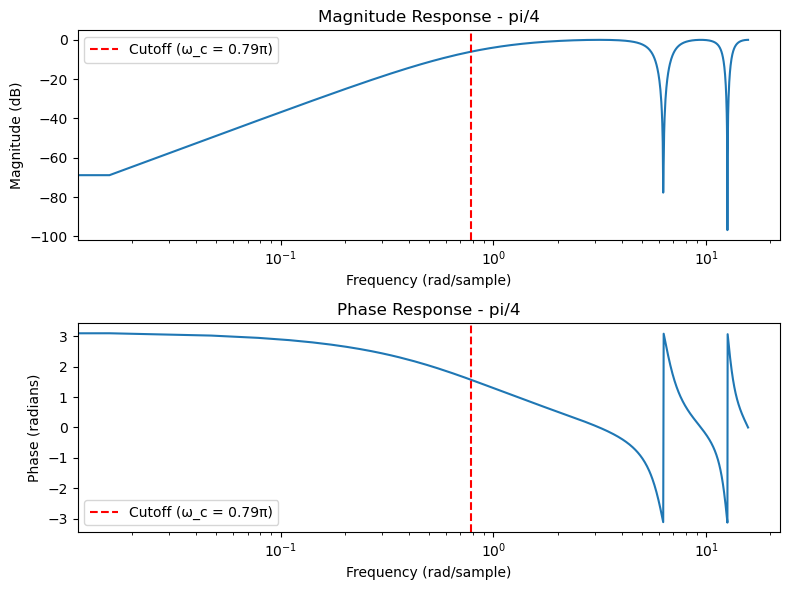

In [46]:
# Define the frequency range
w = np.linspace(-5*np.pi, 5*np.pi, 1000)

# Cutoff frequency
w_c = np.pi/4

# Compute the frequency response
H = high_pass(np.exp(1j*w), w_c)

# Compute the magnitude (in dB) and phase
mag = 20 * np.log10(np.abs(H))
phase = np.angle(H)

# Plot the magnitude and phase
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].semilogx(w, mag)
axs[0].set_title('Magnitude Response - pi/4')
axs[0].set_xlabel('Frequency (rad/sample)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[0].legend()

axs[1].semilogx(w, phase)
axs[1].set_title('Phase Response - pi/4')
axs[1].set_xlabel('Frequency (rad/sample)')
axs[1].set_ylabel('Phase (radians)')
axs[1].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[1].legend()

plt.tight_layout()
plt.show()

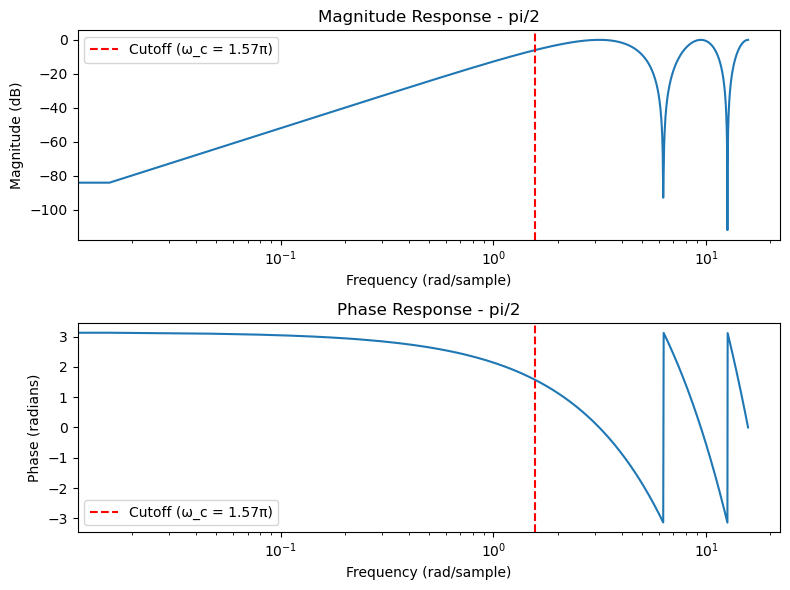

In [49]:
# Define the frequency range
w = np.linspace(-5*np.pi, 5*np.pi, 1000)

# Cutoff frequency
w_c = np.pi/2

# Compute the frequency response
H = high_pass(np.exp(1j*w), w_c)

# Compute the magnitude (in dB) and phase
mag = 20 * np.log10(np.abs(H))
phase = np.angle(H)

# Plot the magnitude and phase
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].semilogx(w, mag)
axs[0].set_title('Magnitude Response - pi/2')
axs[0].set_xlabel('Frequency (rad/sample)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[0].legend()

axs[1].semilogx(w, phase)
axs[1].set_title('Phase Response - pi/2')
axs[1].set_xlabel('Frequency (rad/sample)')
axs[1].set_ylabel('Phase (radians)')
axs[1].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[1].legend()

plt.tight_layout()
plt.show()

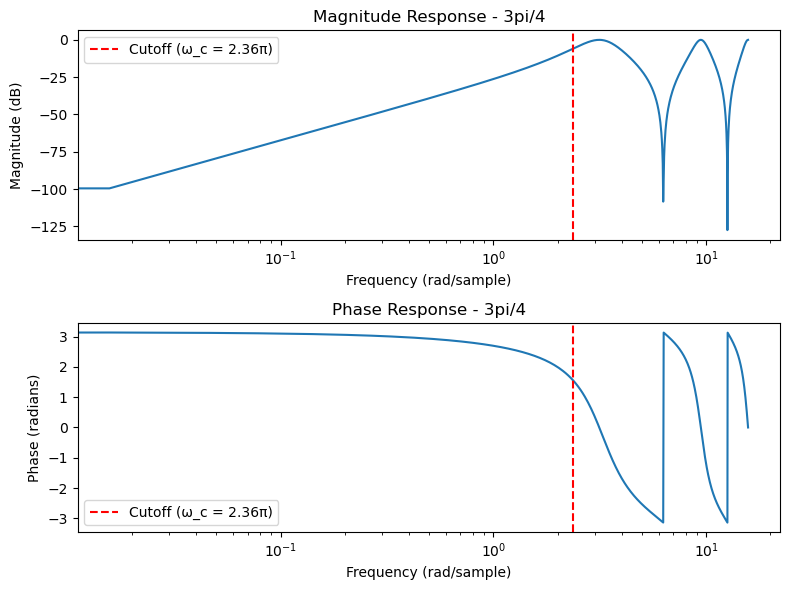

In [50]:
# Define the frequency range
w = np.linspace(-5*np.pi, 5*np.pi, 1000)

# Cutoff frequency
w_c = 3 * np.pi/4

# Compute the frequency response
H = high_pass(np.exp(1j*w), w_c)

# Compute the magnitude (in dB) and phase
mag = 20 * np.log10(np.abs(H))
phase = np.angle(H)

# Plot the magnitude and phase
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].semilogx(w, mag)
axs[0].set_title('Magnitude Response - 3pi/4')
axs[0].set_xlabel('Frequency (rad/sample)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[0].legend()

axs[1].semilogx(w, phase)
axs[1].set_title('Phase Response - 3pi/4')
axs[1].set_xlabel('Frequency (rad/sample)')
axs[1].set_ylabel('Phase (radians)')
axs[1].axvline(w_c, color='r', linestyle='--', label=f'Cutoff (ω_c = {w_c:.2f}π)')
axs[1].legend()

plt.tight_layout()
plt.show()


_(b) Plot the magnitude and phase of the frequency response for just the all-pass component, $H_{AP}(z) = −
\frac{z-a}{1−az}$
. Verify that it is indeed all-pass. From these plots, can
you explain how it converted the low-pass filter into a high-pass one?_

The graph of the magnitude plot a straight line at magnitude = 1, verifying that it is all pass for all frequencies across the specturm. In contrast, the graph of the phase depicts a phase shift occuring below and after the zero frequency mark. It is this characteristic that converts the low-pass filter into a high-pass filter.

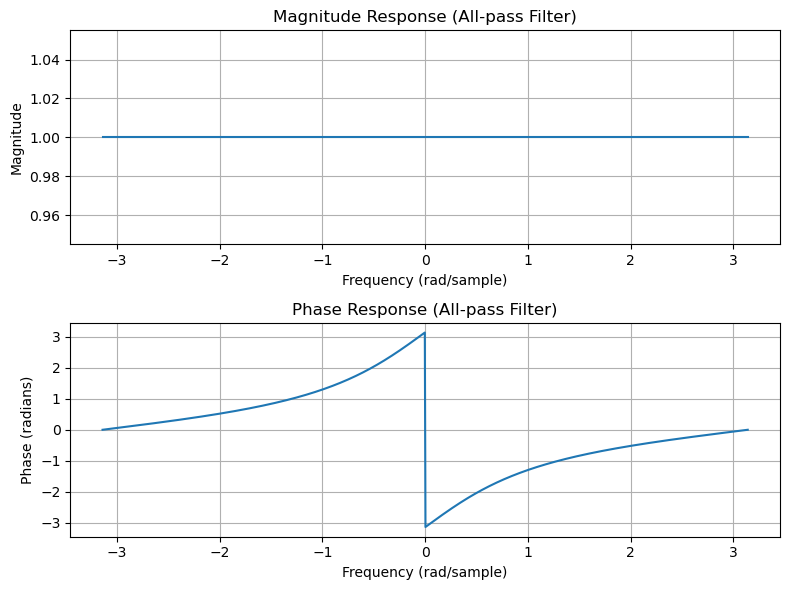

In [51]:
def all_pass(z, a):
    return -(z - a) / (1 - a * z)

w = np.linspace(-np.pi, np.pi, 1000)
w_c = np.pi / 4

a = np.cos(np.pi / 4 + w_c / 2) / np.cos(np.pi / 4 - w_c / 2)
H_AP = all_pass(np.exp(1j * w), a)

mag_AP = np.abs(H_AP)
phase_AP = np.angle(H_AP)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(w, mag_AP)
axs[0].set_title('Magnitude Response (All-pass Filter)')
axs[0].set_xlabel('Frequency (rad/sample)')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)

axs[1].plot(w, phase_AP)
axs[1].set_title('Phase Response (All-pass Filter)')
axs[1].set_xlabel('Frequency (rad/sample)')
axs[1].set_ylabel('Phase (radians)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Question 4. 

Often we are given a signal that has been blurred (for example, having gone through
some sort of low-pass filter), and we want to recover the original unblurred signal.
Consider the moving average LTI system we covered in class:

$y[n] = \frac{1}{M} \sum_{k=0}^{M-1}x[n-k]$

Say you are given an output of this system, y[n], and you want to recover the input,
x[n].

(a) One approach is to create an inverse filter through the z-transform. If H(z) is the
transfer function of the moving average filter, it’s inverse would be:

$H^
{−1}
(z) = \frac{1}
{H(z)}
.$

_What is the equation for $H^{−1}
(z)$? What would be the problem with constructing
a system from this inverse transfer function?_

$H^{-1}(z) = \frac{M}{\sum_{k=0}^{M-1}z^{-k}}$

The problem with constructing this system using the inverse transfer function, is that the inverse filter has a pole at z=1. That means frequencies in the regions around this pole may be significantly altered, and therfore will not create an ideal reconstruction of the original input signal x[n].

_(b) Another potential approach to reversing the moving average filter is to apply a
sequence of systems, $h_1[n]$ followed by $h_2[n]$, where_

$h_1[n] = \sum_{k=0}^{K}
δ[n-kM],
h_2[n] = δ[n] − δ[n − 1]$.


_What is the impulse response of this system? Explain how this system works
and under what conditions applying this system to an output y[n] of the moving
average filter will perfectly recover the input, x[n]._



The application of the sequence of systems is done through the convolution of $h_1[n] \ast h_2[n] \ast y[n]$
And because convolution is associative, I can convolve systems $h_1$ and $h_2$ into a singular system $h[n]$.
 $x[n] = y[n] \ast h[n]$, where h[n], the convolution of $h_1$ and $h_2$, now represents the impulse response of the resulting system. 

The system works based off of the characteristics of $h_1[n]$ and $h_2[n]$ and the way in which they manipulate the filter. $h_1[n]$ is a comb filter that isolates individual signals along jump intervals of M to effectively reverse the averaging component of the moving average filter. $h_2[n]$ works to reverse the summation component of the moving average filter by sequentially taking the difference between samples.

The necessary conditions for the application of the system to the moving average filter to perfectly recover the input are:
1. The length of the moving average filter, M, must be an integer.
2. The constant K within $h_1[n]$ must be greater than or equal to $M-1$.

(c) Generate a standard Gaussian random signal: x[n] ∼ N(0, 1) for n ∈ [0, 1000].
(You can use the np.random.normal function to do this!) Apply a moving average
filter with M = 10 to this signal to get a blurred signal y[n]. Plot both x[n] and
y[n] separately.

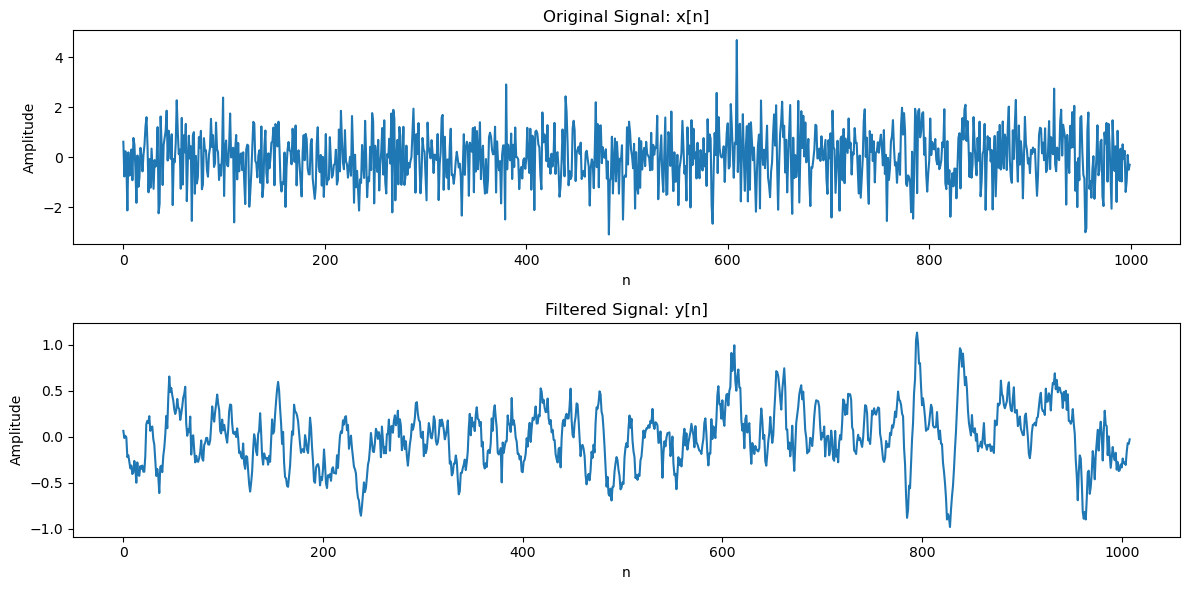

In [52]:
x = np.random.normal(0,1,1000)
M = 10
y = np.convolve (x,np.ones(M)/M)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Original Signal: x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Filtered Signal: y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

_(d) Try to recover x[n] by applying the system associated with H^{−1}
(z) in part (a) to
y[n]. What happens?_




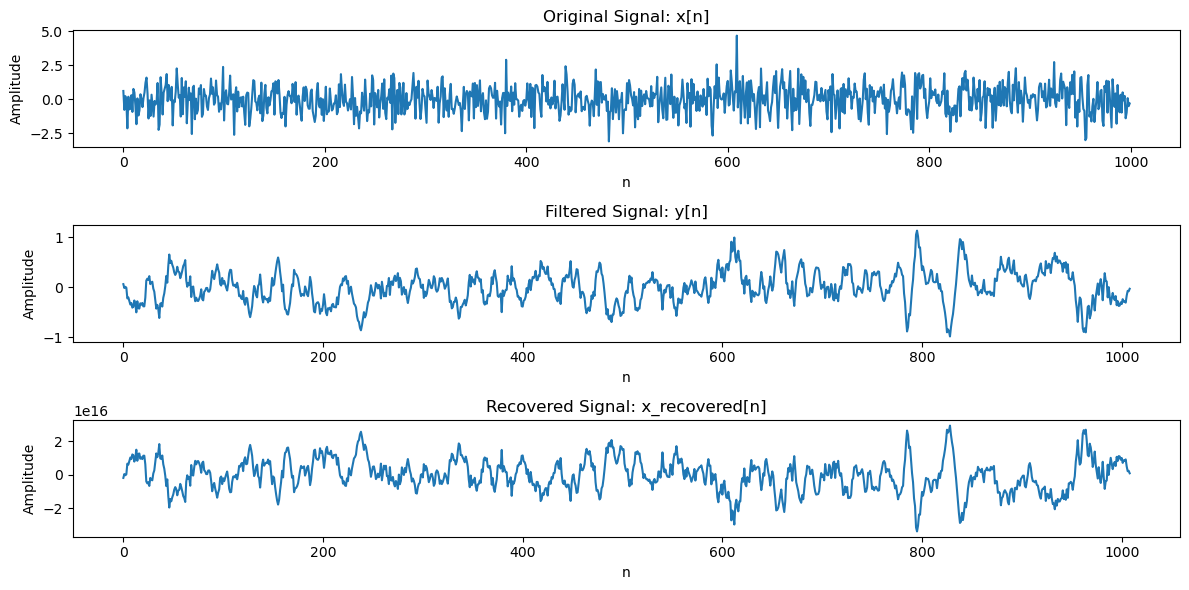

In [63]:
n = 1000
x_n = np.zeros_like(y)
# Recover x[n] by applying the inverse system H^{-1}(z) in the z-domain
H_inv = M / np.sum(np.exp(-1j * 2 * np.pi * -1 * np.arange(M) / M))
x_recovered = np.fft.ifft(np.fft.fft(y) * H_inv).real 

# Plot the original, filtered, and recovered signals
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(x)
plt.title('Original Signal: x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(y)
plt.title('Filtered Signal: y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(x_recovered)
plt.title('Recovered Signal: x_recovered[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

(e) Try to recover x[n] by applying the two-step system in part (b) to y[n]. Plot your
result and compare to the plot of x[n]. Were you able to reconstruct the original
signal?


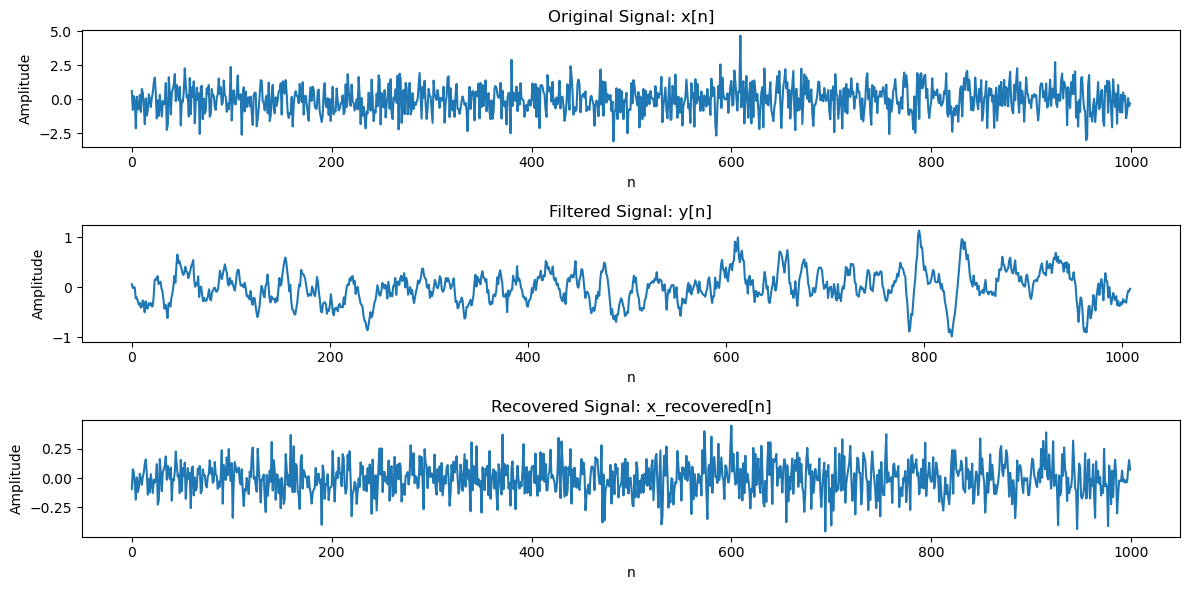

In [62]:
# Define the filters h1[n] and h2[n]
h1 = np.zeros(n)
for k in range(M):
    h1[k*M] = 1

h2 = np.zeros(n)
h2[0] = 1
h2[1] = -1


# Apply the system associated with h1[n] and h2[n] to recover x[n]
x_recovered = np.convolve(np.convolve(y, h1, mode='full'), h2, mode='full')
x_recovered = x_recovered[M-1:M-1+n]

# Plot the original, filtered, and recovered signals
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(x)
plt.title('Original Signal: x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(y)
plt.title('Filtered Signal: y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(x_recovered)
plt.title('Recovered Signal: x_recovered[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()